Seasonal Indices:
Time
0    0.503751
1    1.206874
2    0.784725
3    1.504649
Name: Ratio, dtype: float64


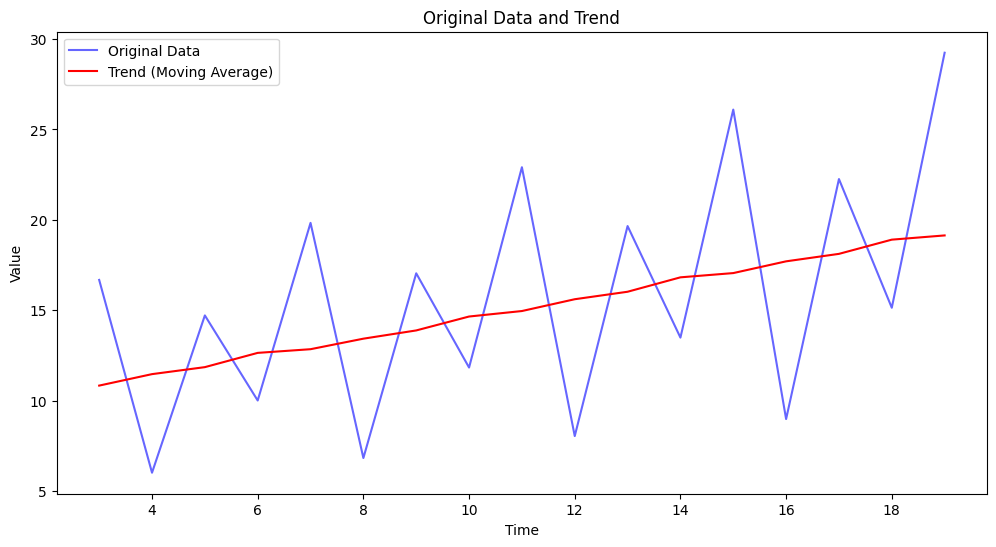

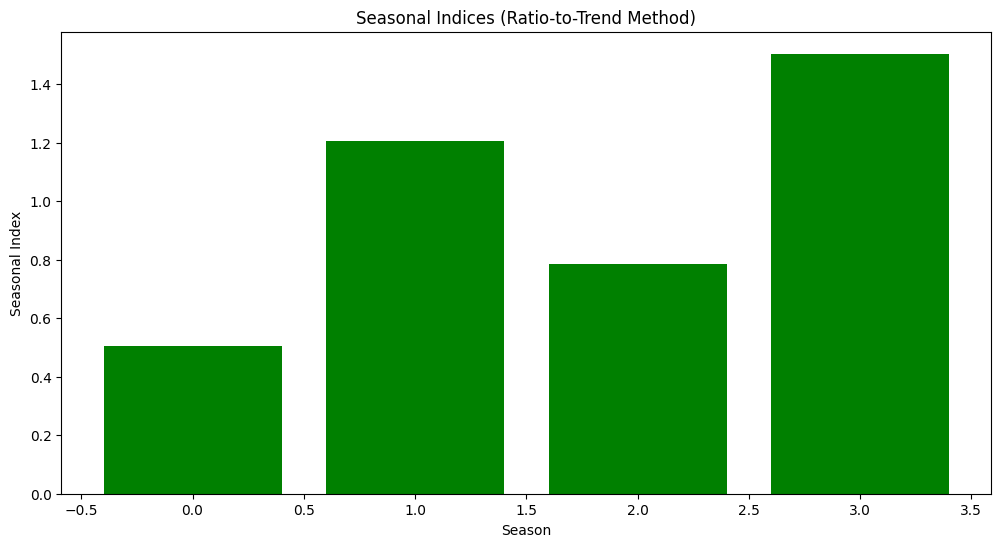

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate synthetic time series data
periods = 4  # Number of seasons in a year
years = 5
time = np.arange(1, periods * years + 1)
trend = np.linspace(10, 20, periods * years)  # Linear trend
seasonal_pattern = np.tile([1.2, 0.8, 1.5, 0.5], years)  # Seasonal component
noise = np.random.normal(0, 0.1, size=time.shape)  # Random noise
data = trend * seasonal_pattern + noise

# Create a pandas DataFrame
df = pd.DataFrame({'Time': time, 'Data': data})

# Define the window size for the moving average (should be the length of one period)
window_size = periods

# Calculate the moving average as the trend
df['Trend'] = df['Data'].rolling(window=window_size, center=True).mean()

# Drop NaN values resulting from the moving average calculation
df.dropna(inplace=True)

# Calculate the ratio of actual values to the trend values
df['Ratio'] = df['Data'] / df['Trend']

# Compute the average ratio for each season
seasonal_indices = df.groupby(df['Time'] % periods)['Ratio'].mean()

# Normalize the seasonal indices to have an average of 1
seasonal_indices /= seasonal_indices.mean()

print("Seasonal Indices:")
print(seasonal_indices)
   # Plot the original data and the trend
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Data'], label='Original Data', color='blue', alpha=0.6)
plt.plot(df['Time'], df['Trend'], label='Trend (Moving Average)', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Original Data and Trend')
plt.show()
  # Plot the seasonal indices
plt.figure(figsize=(12, 6))
plt.bar(seasonal_indices.index, seasonal_indices.values, color='green')
plt.xlabel('Season')
plt.ylabel('Seasonal Index')
plt.title('Seasonal Indices (Ratio-to-Trend Method)')
plt.show()



Seasonal Indices:
Season
0    0.503751
1    1.206874
2    0.784725
3    1.504649
Name: Ratio, dtype: float64


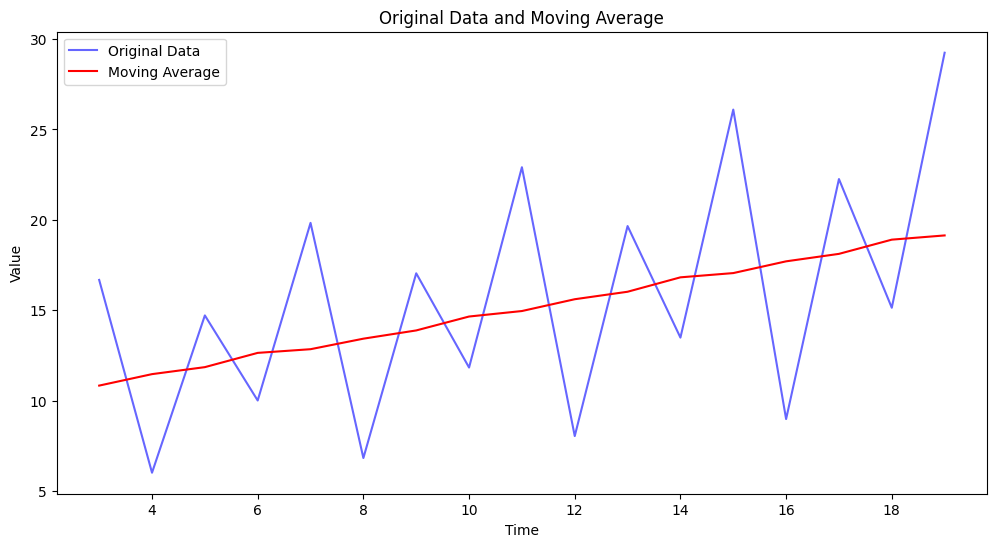

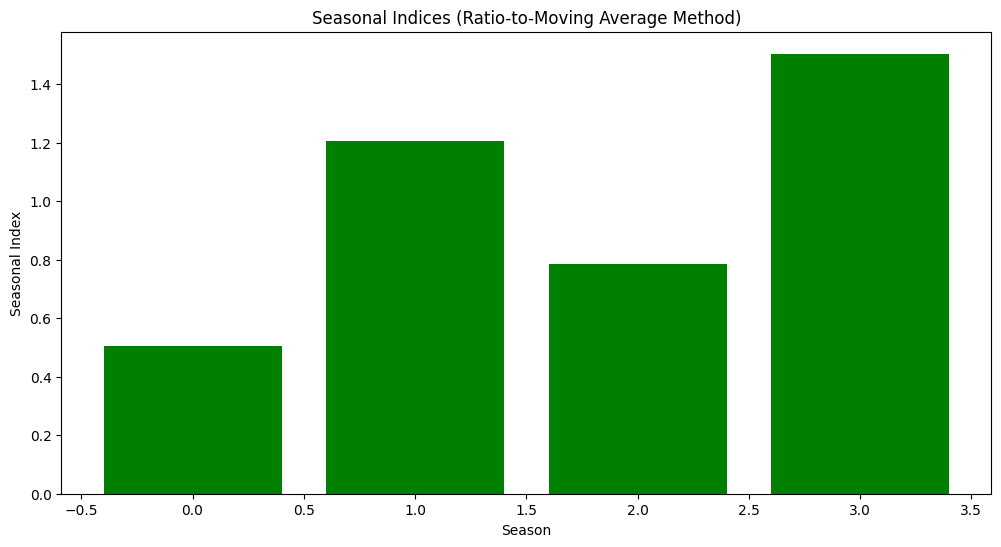

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate synthetic time series data
periods = 4  # Number of seasons in a year
years = 5
time = np.arange(1, periods * years + 1)
trend = np.linspace(10, 20, periods * years)  # Linear trend
seasonal_pattern = np.tile([1.2, 0.8, 1.5, 0.5], years)  # Seasonal component
noise = np.random.normal(0, 0.1, size=time.shape)  # Random noise
data = trend * seasonal_pattern + noise

# Create a pandas DataFrame
df = pd.DataFrame({'Time': time, 'Data': data})

# Define the window size for the moving average (should be the length of one period)
window_size = periods

# Calculate the moving average as the trend
df['Moving_Average'] = df['Data'].rolling(window=window_size, center=True).mean()

# Drop NaN values resulting from the moving average calculation
df.dropna(inplace=True)

# Calculate the ratio of actual values to the moving average values
df['Ratio'] = df['Data'] / df['Moving_Average']

# Compute the average ratio for each season
df['Season'] = df['Time'] % periods
seasonal_indices = df.groupby('Season')['Ratio'].mean()

# Normalize the seasonal indices to have an average of 1
seasonal_indices /= seasonal_indices.mean()

print("Seasonal Indices:")
print(seasonal_indices)

# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Data'], label='Original Data', color='blue', alpha=0.6)
plt.plot(df['Time'], df['Moving_Average'], label='Moving Average', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Original Data and Moving Average')
plt.show()

# Plot the seasonal indices
plt.figure(figsize=(12, 6))
plt.bar(seasonal_indices.index, seasonal_indices.values, color='green')
plt.xlabel('Season')
plt.ylabel('Seasonal Index')
plt.title('Seasonal Indices (Ratio-to-Moving Average Method)')
plt.show()

In [8]:
# Example sales data for 3 years (36 months)
np.random.seed(0)
data = {
    'Year': np.repeat([1, 2, 3], 12),
    'Month': list(range(1, 13)) * 3,
    'Sales': np.random.randint(80, 120, size=36)
}

df = pd.DataFrame(data)

# Calculate Link Relatives
df['Link_Relative'] = df['Sales'] / df['Sales'].shift(1)
df['Link_Relative'].iloc[::12] = np.nan  # Reset for the start of each year

# Calculate Average Link Relatives
average_link_relatives = df.groupby('Month')['Link_Relative'].mean()

# Adjusting so the average of indices is 100
average_link_relatives = average_link_relatives.fillna(1)  # Replace NaN with 1 for calculation
seasonal_indices = (average_link_relatives / average_link_relatives.mean()) * 100

seasonal_indices


C:\Users\Akash Mishra\AppData\Local\Temp\ipykernel_19104\1194245322.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Link_Relative'].iloc[::12] = np.nan  # Reset for the start of each year


Month
1      98.503855
2      94.495890
3     109.740084
4     116.886532
5      80.627068
6     109.899710
7     102.652959
8     107.009605
9      93.035048
10     86.319671
11    103.610915
12     97.218662
Name: Link_Relative, dtype: float64

In [10]:
import numpy as np
import pandas as pd

# Example sales data for 3 years (36 months)
np.random.seed(0)
data = {
    'Year': np.repeat([1, 2, 3], 12),
    'Month': list(range(1, 13)) * 3,
    'Sales': np.random.randint(80, 120, size=36)
}

df = pd.DataFrame(data)

# Calculate Differences
df['Difference'] = df['Sales'].diff()
df = df.dropna()  # Remove NaN values resulting from the difference calculation

# Calculate the Variance of Differences
variance_difference = df['Difference'].var()
variance_difference

218.60000000000002